In [182]:
import pandas as pd
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics

(1797, 64)


<Figure size 432x288 with 0 Axes>

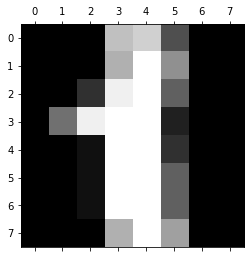

In [183]:
from sklearn.datasets import load_digits
digits = load_digits(n_class=10)
print(digits.data.shape)
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[1])

plt.show()

In [184]:
X = digits.data
y = digits.target

In [185]:
X = StandardScaler().fit_transform(X)

In [186]:
X = pd.DataFrame(X)
y = pd.DataFrame(y)

In [187]:
y = np.ravel(y)

In [188]:
X.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,0.0,-0.335016,-0.043081,0.274072,-0.664478,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,0.482974,0.759622,-0.058426,1.127721,0.879583,-0.130433,-0.044625,0.111443,0.895880,-0.860666,-1.149648,0.515472,1.905963,-0.114222,-0.03338,0.486489,0.469885,-1.499901,-1.614063,0.076398,1.541814,-0.047232,0.0,0.764656,0.052630,-1.447630,-1.736664,0.043616,1.439558,0.0,-0.061344,0.810554,0.630117,-1.122457,-1.066232,0.660965,0.818451,-0.088742,-0.035433,0.742119,1.150652,-0.868671,0.110130,0.537611,-0.757436,-0.209785,-0.023596,-0.299081,0.086719,0.208293,-0.366771,-1.146647,-0.505670,-0.196008
1,0.0,-0.335016,-1.094937,0.038648,0.268751,-0.138020,-0.409724,-0.125023,-0.059078,-0.624009,-1.915573,-0.246304,1.196450,0.136195,-0.514991,-0.130433,-0.044625,-0.727646,-1.213385,1.380308,1.441860,-0.291553,-0.548805,-0.114222,-0.03338,1.440185,0.954513,1.220586,0.987402,-0.945588,-0.628896,-0.047232,0.0,-0.672372,-1.054452,1.105570,0.960644,-0.978702,-0.822695,0.0,-0.061344,-0.531284,-0.899839,1.362175,1.330789,-0.392787,-0.798272,-0.088742,-0.035433,-0.403575,-1.153118,1.236394,1.242083,-0.457500,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-0.249010,0.849632,0.548561,-0.505670,-0.196008
2,0.0,-0.335016,-1.094937,-1.844742,0.735366,1.097673,-0.409724,-0.125023,-0.059078,-0.624009,-1.362062,1.011104,0.987304,0.962467,-0.514991,-0.130433,-0.044625,-0.727646,-0.334525,1.035543,0.146106,1.322497,-0.548805,-0.114222,-0.03338,-0.785105,-1.307084,-0.479719,0.824811,0.587391,-0.628896,-0.047232,0.0,-0.384967,0.052630,0.626845,0.792062,-1.319475,-0.822695,0.0,-0.061344,2.487851,1.395095,1.362175,-0.427026,-1.446538,-0.798272,-0.088742,-0.035433,1.314966,0.973439,1.236394,1.242083,0.371759,0.259230,-0.209785,-0.023596,-0.299081,-1.089383,-2.078218,-0.164037,1.565686,1.695137,-0.196008
3,0.0,-0.335016,0.377661,0.744919,0.268751,-0.844129,-0.409724,-0.125023,-0.059078,1.879691,0.482974,-1.503711,0.987304,-0.690077,-0.514991,-0.130433,-0.044625,-0.168254,-1.564930,1.035543,0.955952,-1.259982,-0.548805,-0.114222,-0.03338,-0.785105,-1.145542,1.050555,0.174444,-1.115919,-0.628896,-0.047232,0.0,-0.672372,-1.212607,-1.288055,0.286317,0.554775,-0.539913,0.0,-0.061344,-0.531284,-1.052835,-1.122457,-1.066232,0.309714,1.049411,-0.088742,-0.035433,-0.403575,0.087374,-1.060040,-0.833165,0.869315,1.072563,-0.209785,-0.023596,-0.299081,0.282736,0.208293,0.241430,0.379040,-0.505670,-0.196008
4,0.0,-0.335016,-1.094937,-2.551014,-0.197863,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,-1.915573,-1.252229,-0.476718,-1.351095,-0.514991,-0.130433,-0.044625,-0.727646,-1.564930,1.035543,-0.177833,-0.937173,0.064887,-0.114222,-0.03338,-0.785105,-0.337828,1.050555,-1.614063,0.246729,1.541814,-0.047232,0.0,0.764656,1.317867,0.148120,-1.736664,1.236320,0.873995,0.0,-0.061344,0.810554,1.242100,1.362175,0.851385,1.363466,-0.567312,-0.088742,-0.035433,-0.403575,-1.330331,-1.251410,1.053424,0.205907,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-2.306869,0.849632,-0.468564,-0.505670,-0.196008
5,0.0,-0.335016,1.429517,-0.432200,-2.764242,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,0.667478,1.011104,1.196450,0.962467,-0.514991,-0.130433,-0.044625,-0.727646,0.544336,1.552691,1.279891,0.354067,-0.241959,-0.114222,-0.03338,-0.785105,0.308342,1.220586,0.987402,-0.093933,-0.628896,-0.047232,0.0,-0.672372,-1.212607,-0.809330,-0.556592,1.236320,1.156776,0.0,-0.061344,-0.531284,-1.052835,-1.122457,-0.586828,1.363466,1.280372,-0.088742,-0.035433,-0.403575,-0.444265,-1.060040,0.487447,1.201019,0.055897,-0.209785,-0.023596,-0.299081,0.674770,0.894246,0.849632,0.548561,-0.505670,-0.196008
6,0.0,-0.335016,-1.094937,0.038648,0.268751,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,-0.993055,1.011104,-0.476718,-1.351095,-0.514991,-0.130433,-0.044625,-0.727646,0.544336,1.552691,-0.663741,-1.259982

In [189]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

def get_metrics(intro_text, y_true, y_predicted):
    print("\n" + intro_text + "\n")
    print("Accuracy: ",round(accuracy_score(y_true, y_predicted),3))
    print("Precision: ",round(precision_score(y_true, y_predicted, average='micro'),3))
    print("Recall: ",round(recall_score(y_true, y_predicted, average='micro'),3))
    print("Balanced accuracy: ",round(balanced_accuracy_score(y_true, y_predicted),3))

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

#1. KNN Classifier

In [191]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
cross_validate(knn, X_train, y_train, cv=5)["test_score"].mean()

0.9689748940744958

In [192]:
from sklearn.model_selection import GridSearchCV

model = KNeighborsClassifier()

# Hyperparameter Grid
k_grid = {'n_neighbors' : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
          'p': [1,2,3]}

# Instanciate Grid Search
grid = GridSearchCV(model, k_grid, n_jobs=-1,  cv = 5)

# Fit data to Grid Search
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20],
                         'p': [1, 2, 3]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [193]:
grid.best_params_

{'n_neighbors': 3, 'p': 1}

In [194]:
grid.best_score_

0.9769240498324164

In [195]:
scores=[]
for k in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores.append(cross_validate(knn, X_train, y_train, cv=5)["test_score"].mean())

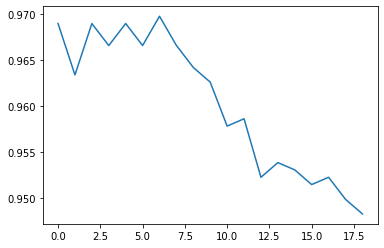

In [196]:
import matplotlib.pyplot as plt
plt.plot(scores);

In [197]:
from sklearn.metrics import classification_report

best_model = KNeighborsClassifier(n_neighbors=3, p=1)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

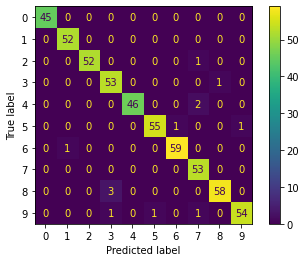

In [198]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(best_model, X_test, y_test)

In [199]:
get_metrics("Metrics for test set with kNN", y_test, y_pred)


Metrics for test set with kNN

Accuracy:  0.976
Precision:  0.976
Recall:  0.976
Balanced accuracy:  0.977


In [200]:
target_names = ['digit-0', 'digit-1', 'digit-2', 'digit-3', 'digit-4', 'digit-5', 'digit-6', 'digit-7', 'digit_8', 'digit-9']
classification_report(y_test, y_pred, target_names=target_names)

'              precision    recall  f1-score   support\n\n     digit-0       1.00      1.00      1.00        45\n     digit-1       0.98      1.00      0.99        52\n     digit-2       1.00      0.98      0.99        53\n     digit-3       0.93      0.98      0.95        54\n     digit-4       1.00      0.96      0.98        48\n     digit-5       0.98      0.96      0.97        57\n     digit-6       0.98      0.98      0.98        60\n     digit-7       0.93      1.00      0.96        53\n     digit_8       0.98      0.95      0.97        61\n     digit-9       0.98      0.95      0.96        57\n\n    accuracy                           0.98       540\n   macro avg       0.98      0.98      0.98       540\nweighted avg       0.98      0.98      0.98       540\n'

# 2. SVM

In [201]:

from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

# Train model with default alpha=1
clf = svm.SVC(kernel='rbf')
# get cross val scores
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')

print('CV Mean: ', np.mean(scores))
print('STD: ', np.std(scores))
print('\n')

CV Mean:  0.9793050022133688
STD:  0.00731572884811869




In [202]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid_result = grid.fit(X_train, y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.103, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.127, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.104, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.104, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.104, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.234, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.262, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.263, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.235, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   17.0s finished


In [203]:
# Train model with default alpha=1
clf = svm.SVC(kernel='rbf', C= 10, gamma= 0.01)
# get cross val scores
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')

print('CV Mean: ', np.mean(scores))
print('STD: ', np.std(scores))
print('\n')

CV Mean:  0.9832890659583887
STD:  0.005864877434404593




In [204]:
clf = svm.SVC(kernel='rbf', C= 10, gamma= 0.01, probability = True).fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [205]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 51,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0, 53,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 53,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 48,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 55,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 60,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 53,  0,  0],
       [ 0,  1,  1,  0,  0,  0,  0,  0, 59,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  1,  0, 55]])

Text(0.5, 257.44, 'Predicted label')

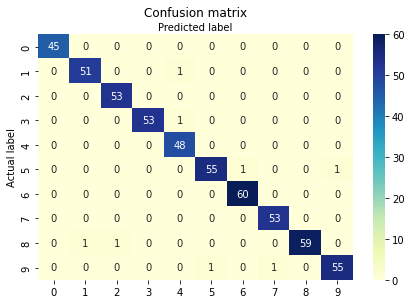

In [206]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [207]:
get_metrics("Metrics for test set with SVM", y_test, y_pred)


Metrics for test set with SVM

Accuracy:  0.985
Precision:  0.985
Recall:  0.985
Balanced accuracy:  0.986


In [208]:
import scipy.stats as stats
import math

sample_size = len(X)
sample_mean = X.mean()

z_critical = stats.norm.ppf(q = 0.975)

print("z-critical value:")              
print(z_critical)                        

X_stdev = X.std()  

margin_of_error = z_critical * (X_stdev/math.sqrt(sample_size))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.959963984540054
Confidence interval:
(0     0.000000
1    -0.046248
2    -0.046248
3    -0.046248
4    -0.046248
        ...   
59   -0.046248
60   -0.046248
61   -0.046248
62   -0.046248
63   -0.046248
Length: 64, dtype: float64, 0     0.000000
1     0.046248
2     0.046248
3     0.046248
4     0.046248
        ...   
59    0.046248
60    0.046248
61    0.046248
62    0.046248
63    0.046248
Length: 64, dtype: float64)


#3. Random Forest Classifier

In [209]:
from sklearn.ensemble import RandomForestClassifier

In [210]:
# Train model with default 
clf = RandomForestClassifier(max_depth=2, random_state=0)
# get cross val scores
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')

print('CV Mean: ', np.mean(scores))
print('STD: ', np.std(scores))
print('\n')

CV Mean:  0.8217858723834819
STD:  0.01852169861706539




In [175]:
# find optimal with grid search

rfc = RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

grid = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
grid_result = grid.fit(X_train, y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  0.9713558464554481
Best Params:  {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}


In [176]:
# Train model with default 
clf = RandomForestClassifier(criterion='entropy', max_depth=8, max_features='auto', n_estimators = 500)
# get cross val scores
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')

print('CV Mean: ', np.mean(scores))
print('STD: ', np.std(scores))
print('\n')

CV Mean:  0.9713558464554481
STD:  0.005874045061101303




In [177]:
clf = RandomForestClassifier(criterion='entropy', max_depth=8, max_features='auto', n_estimators = 500).fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [178]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 51,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  2, 51,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 53,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 47,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 54,  1,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 60,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 53,  0,  0],
       [ 0,  1,  0,  1,  0,  1,  0,  1, 57,  0],
       [ 0,  0,  0,  1,  0,  2,  0,  0,  0, 54]])

Text(0.5, 257.44, 'Predicted label')

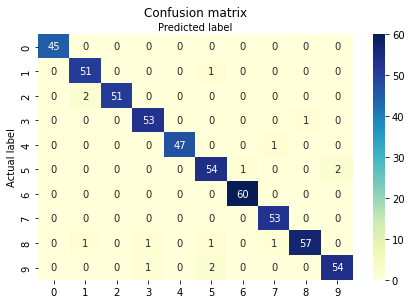

In [179]:
import seaborn as sns
%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [180]:
get_metrics("Metrics for test set with Random Forest Classifier", y_test, y_pred)


Metrics for test set with Random Forest Classifier

Accuracy:  0.972
Precision:  0.972
Recall:  0.972
Balanced accuracy:  0.973


In [181]:
sample_size = len(X)
sample_mean = X.mean()

z_critical = stats.norm.ppf(q = 0.975)

print("z-critical value:")              
print(z_critical)                        

X_stdev = X.std()  

margin_of_error = z_critical * (X_stdev/math.sqrt(sample_size))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.959963984540054
Confidence interval:
(0     0.000000
1    -0.046248
2    -0.046248
3    -0.046248
4    -0.046248
        ...   
59   -0.046248
60   -0.046248
61   -0.046248
62   -0.046248
63   -0.046248
Length: 64, dtype: float64, 0     0.000000
1     0.046248
2     0.046248
3     0.046248
4     0.046248
        ...   
59    0.046248
60    0.046248
61    0.046248
62    0.046248
63    0.046248
Length: 64, dtype: float64)


# 4. Logistic regression

In [138]:
from sklearn.linear_model import LogisticRegression

model_reg = LogisticRegression(random_state=0, max_iter=1000)
scores = cross_val_score(model_reg, X_train, y_train, cv=5, scoring='balanced_accuracy')

print('Mean: ', round(np.mean(scores),4))
print('STD: ', round(np.std(scores),4))

Mean:  0.9684
STD:  0.0082


In [140]:
# find optimal alpha with grid search
from sklearn.model_selection import RandomizedSearchCV

param_grid = {"C":np.logspace(-3,3,7), 
              "penalty":["l1","l2"]} # l1 lasso l2 ridge

grid = RandomizedSearchCV(LogisticRegression(), param_grid, scoring='balanced_accuracy', cv=5, n_jobs=-1)

grid_result = grid.fit(X_train, y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  0.9683632140806052
Best Params:  {'penalty': 'l2', 'C': 1.0}


In [141]:
# Train model with best parameters
model_reg = LogisticRegression(C=1.0, penalty='l2', max_iter=1000)
cv_results = cross_validate(model_reg, X, y, scoring='balanced_accuracy', cv=5, return_train_score=True)

print("\nTraining Time")
print('Mean: ', round(np.mean(cv_results['fit_time']),6))
print('STD: ', round(np.std(cv_results['fit_time']),6))

print("\nTrain Accuracy")
print('Mean: ', round(np.mean(cv_results['train_score']),4))
print('STD: ', round(np.std(cv_results['train_score']),4))

print("\nTest Accuracy")
print('Mean: ', round(np.mean(cv_results['test_score']),4))
print('STD: ', round(np.std(cv_results['test_score']),4))


Training Time
Mean:  0.262447
STD:  0.002393

Train Accuracy
Mean:  0.999
STD:  0.0006

Test Accuracy
Mean:  0.9194
STD:  0.0308


In [142]:
model_reg = LogisticRegression(C=1.0, penalty='l2', max_iter=1000)
model_reg.fit(X_train, y_train)

y_pred = model_reg.predict(X_test)

In [144]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cnf_matrix, normalize = False, title = "Confusion Matrix")

TypeError: ignored

In [145]:
get_metrics("Logistic Regression", y_test, y_pred)


Logistic Regression

Accuracy:  0.957
Precision:  0.957
Recall:  0.957
Balanced accuracy:  0.959


In [ ]:
import time
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE

k_neigh = 14

# get a list of LogisticRegression models to evaluate
def get_lr_models():
	models = dict()
	for i in range(20, 30):
		rfe = RFE(estimator=(LogisticRegression()), n_features_to_select=i)
		model = LogisticRegression()
		models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
	return models

# get a list of kNN models to evaluate
def get_knn_models():
	models = dict()
	for i in range(20, 30):
		rfe = RFE(estimator=KNeighborsClassifier(n_neighbors = k_neigh), n_features_to_select=i)
		model = KNeighborsClassifier(n_neighbors = k_neigh)
		models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
	return models

# get a list of Decision Tree models to evaluate
def get_tree_models():
	models = dict()
	for i in range(20, 30):
		#we haven't found the optimum alpha yet. It's in the code below, in the Decision Tree section
		#rfe = RFE(estimator=DecisionTreeClassifier(ccp_alpha = optimum_alpha), n_features_to_select=i)
		#model = DecisionTreeClassifier(ccp_alpha = optimum_alpha)
		
		rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
		model = DecisionTreeClassifier()
		models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
	return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='balanced_accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

def evaluate_all_models(models, title):
  start = time.time()

  # evaluate the models and store results
  results, names = list(), list()
  for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
  # plot model performance for comparison
  plt.boxplot(results, labels=names, showmeans=True)
  plt.title(title)
  plt.ylim((0.5,1))
  plt.show()

  stop = time.time()

  print(f'Total time (seconds): {stop-start}')